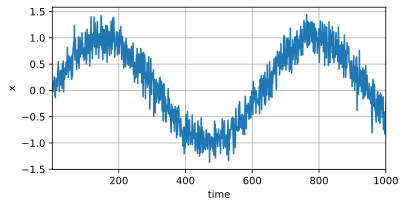

In [2]:
import tensorflow as tf
from d2l import tensorflow as d2l
import matplotlib.pyplot as plt
from model_fns import  train

T = 1000
time = tf.range(1, T + 1, dtype=tf.float32)
X = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2)
d2l.plot(time, [X], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

#plt.show(block=True)


In [3]:

taus = [4, 8, 16, 64]


In [4]:

def plot_fetures(tau = 4):
    features = tf.Variable(tf.zeros((T - tau, tau)))
    for i in range(tau):
        features[:, i].assign(X[i:T - tau + i])
    labels = tf.reshape(X[tau:], (-1, 1))
    batch_size, n_train = 16, 600
    train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

    net = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(1)])
    train(net, train_iter, 5, 0.01)

    one_step_prediction = net(features)
    d2l.plot([time, time[tau:]], [X.numpy(), one_step_prediction.numpy()], f'time with tau :{tau }',
             'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))

epoch 1, loss : 0.162345
epoch 2, loss : 0.103780
epoch 3, loss : 0.073328
epoch 4, loss : 0.061645
epoch 5, loss : 0.058529


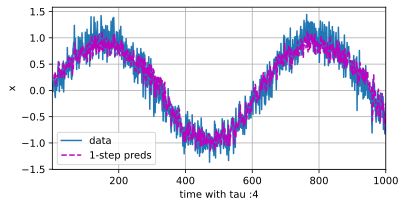

In [5]:
plot_fetures(taus[0])

epoch 1, loss : 0.186105
epoch 2, loss : 0.089921
epoch 3, loss : 0.061341
epoch 4, loss : 0.058325
epoch 5, loss : 0.056734


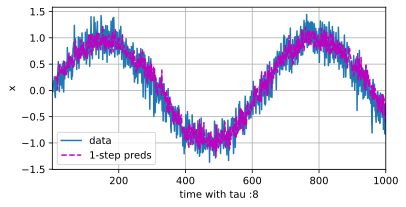

In [6]:
plot_fetures(taus[1])

epoch 1, loss : 0.372796
epoch 2, loss : 0.071882
epoch 3, loss : 0.060365
epoch 4, loss : 0.059196
epoch 5, loss : 0.057846


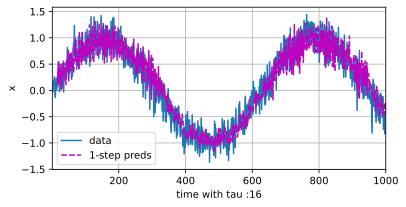

In [7]:
plot_fetures(taus[2])

epoch 1, loss : 0.107459
epoch 2, loss : 0.099949
epoch 3, loss : 0.090207
epoch 4, loss : 0.089679
epoch 5, loss : 0.081200


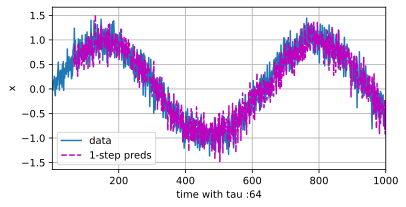

In [8]:
plot_fetures(taus[3])